<a href="https://colab.research.google.com/github/Khalil-Salama/Car_insurance-_claim/blob/main/Insurance_car_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Stakeholder
 - Insurance company
- Task
 - To Know them which feature produces the best accuracy for predicting whether a customer will make a car insurance claim. based on the data they provided us with.

Features dictionary

- id: Unique client identifier

- age: Client's age

- gender:	Client's gender

- driving experience: Years the client has been driving:

- education:	Client's level of education:

- income:	Client's income level

- credit_score:	Client's credit score (between zero and one)

- vehicle_ownership	Client's vehicle ownership status

 - 0: Does not own their vehilce (paying off finance)

 - 1: Owns their vehicle

- vehcile_year:	Year of vehicle registration:

 - 0: Before 2015
 - 1: 2015 or later

- married:	Client's marital status:
 - 0: Not married
 - 1: Married

- children:	Client's number of children

- postal_code:	Client's postal code

- annual_mileage:	Number of miles driven by the client each year
- vehicle_type	Type of car:
 - 0: Sedan
 - 1: Sports car

- speeding_violations:	Total number of speeding violations received by the client

- duis:	Number of times the client has been caught driving under the influence of alcohol

- past_accidents:	Total number of previous accidents the client has been involved in

- outcome:	Whether the client made a claim on their car insurance (response variable):

 - 0: No claim
 - 1: Made a claim

In [416]:
###mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [417]:
###imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [418]:
fpath='/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/05-IntermediateML/Car_Insurance_Claim.csv'
df=pd.read_csv(fpath)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [419]:
###Getting data frame summery
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({'dtype':df.dtypes,'null counts': df.isna().sum(),'null(%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),"min":df.min(),'max':df.max()})
    report.index.name='Column'
    return report.reset_index()
display(summarize_df(df))
display((df.info()))

,Column,dtype,null counts,null(%),nunique,min,max
0,ID,int64,0,0.00,10000,101,999976
1,AGE,object,0,0.00,4,16-25,65+
2,GENDER,object,0,0.00,2,female,male
3,RACE,object,0,0.00,2,majority,minority
4,DRIVING_EXPERIENCE,object,0,0.00,4,0-9y,30y+
5,EDUCATION,object,0,0.00,3,high school,university
6,INCOME,object,0,0.00,4,middle class,working class
7,CREDIT_SCORE,float64,982,9.82,9018,0.053358,0.960819
8,VEHICLE_OWNERSHIP,float64,0,0.00,2,0.0,1.0
9,VEHICLE_YEAR,object,0,0.00,2,after 2015,before 2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

None

- We have 10,000 rows
- We have 19 columns 11 numeric columns and 8 object columns
- We have Null values in Credit score and in Annual milleage

#### Checking for duplicates

In [420]:
###Checking for duplicates
df.duplicated().sum()

np.int64(0)

- No Duplicates were found

#### Dropping features that dont give us useful information for modeling

##### Dropping column ID because it represents the ID number of each indvisual 10000 nunique


In [421]:
###Dropping ID feature
df.drop(columns=['ID'],inplace=True)

##### Dropping column Credit score it represents the credit score for each indivisual 9018 nunique and the rest is Nulls.

In [422]:
###Dropping column credit score
df.drop(columns=['CREDIT_SCORE'],inplace=True)

##### Droping column postal code because it dosent give us any usefull information about our analysis.

In [423]:
###dropping postal code
df.drop(columns=['POSTAL_CODE'],inplace=True)

#### Checking Categorial inconsistancies

In [424]:
##Cat_cols_filter
Cat_cols=df.select_dtypes(include='object').columns
Cat_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [425]:
###loop to check value counts for cat_cols
for col in Cat_cols:
  print(df[col].value_counts())

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64
GENDER
female    5010
male      4990
Name: count, dtype: int64
RACE
majority    9012
minority     988
Name: count, dtype: int64
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64


- All categorical features have no inconsistancies and nothing needs to be converted to numerical type
- No null values in categorical features

#### Checking numerical features

In [426]:
###num col fillter
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [427]:
###Making a loop to describe num cols
for col in num_cols:
  print(df[col].describe())
  print()

count    10000.000000
mean         0.697000
std          0.459578
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: VEHICLE_OWNERSHIP, dtype: float64

count    10000.000000
mean         0.498200
std          0.500022
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: MARRIED, dtype: float64

count    10000.000000
mean         0.688800
std          0.463008
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CHILDREN, dtype: float64

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

count    10000.000000
mean         1.482900
std          2.241966
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000


- No inconsistancies found

Checking num cols value counts

In [428]:
### chhecking num cols value counts
for col in num_cols:
  print(df[col].value_counts())
  print()

VEHICLE_OWNERSHIP
1.0    6970
0.0    3030
Name: count, dtype: int64

MARRIED
0.0    5018
1.0    4982
Name: count, dtype: int64

CHILDREN
1.0    6888
0.0    3112
Name: count, dtype: int64

ANNUAL_MILEAGE
11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: count, dtype: int64

SPEEDING_VIOLATIONS
0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: count, dtype: int64

DUIS
0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: count, dtype: int64

PAST_ACCIDENTS
0     5584
1     1783
2     1104
3     

Num cols with only 2 counts should be coverted to object

In [429]:
### num cols with 2 value counts to object except of OUTCOME
for col in num_cols:
  if df[col].nunique()==2 and col!='OUTCOME':
    df[col]=df[col].astype('object')

#### Checking for null values

In [430]:
###Display a data frame to show null values and there percentge
null_sums=df.isna().sum()
null_columns= null_sums[null_sums>0]
print(null_columns)
###Null values percentge
null_sums_percentage=null_sums/len(df)
null_sums_percentage[null_sums_percentage>0]

ANNUAL_MILEAGE    957
dtype: int64


,0
ANNUAL_MILEAGE,0.0957


- Annual mileage has 957 null values about 10%
- Going to impute them with the mean using simple imputer through the numeric pipeline

#### Checking the data set after cleaning


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   VEHICLE_OWNERSHIP    10000 non-null  object 
 7   VEHICLE_YEAR         10000 non-null  object 
 8   MARRIED              10000 non-null  object 
 9   CHILDREN             10000 non-null  object 
 10  ANNUAL_MILEAGE       9043 non-null   float64
 11  VEHICLE_TYPE         10000 non-null  object 
 12  SPEEDING_VIOLATIONS  10000 non-null  int64  
 13  DUIS                 10000 non-null  int64  
 14  PAST_ACCIDENTS       10000 non-null  int64  
 15  OUTCOME              10000 non-null  

- We still have null values which we will impute later with simple imputer

#### Saving our cleaned data as csv

In [460]:
###saving our cleaned data as csv
fpath_cleaned ='/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/05-IntermediateML/cleaned-data-insurance-car.csv'
###Use to_csv to save the dataframe using the filename
# Save the df_cleaned_robust which has imputed values and removed duplicates
df.to_csv(fpath_cleaned, index=False)
###defining the new df
df1=pd.read_csv(fpath_cleaned)

# Convert specified columns back to object type after reading from CSV
cols_to_convert_to_object = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']
for col in cols_to_convert_to_object:
    df1[col] = df1[col].astype('object')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   VEHICLE_OWNERSHIP    10000 non-null  object 
 7   VEHICLE_YEAR         10000 non-null  object 
 8   MARRIED              10000 non-null  object 
 9   CHILDREN             10000 non-null  object 
 10  ANNUAL_MILEAGE       9043 non-null   float64
 11  VEHICLE_TYPE         10000 non-null  object 
 12  SPEEDING_VIOLATIONS  10000 non-null  int64  
 13  DUIS                 10000 non-null  int64  
 14  PAST_ACCIDENTS       10000 non-null  int64  
 15  OUTCOME              10000 non-null  

### Visulaizing

#### definisions

In [433]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Categorial
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, palette = None): # Added palette parameter
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette=palette, hue=x, legend=False) # Added palette, hue=x, and legend=False to address FutureWarning

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

# Numeric
def explore_numeric(df, x, figsize=(6,5), palette = None): # Added palette parameter
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0], palette=palette) # Added palette

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1], palette=palette) # Added palette

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

  # explore_categorical(df,feature);

  # explore_numeric(df,feature);


In [434]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

#### visualizations

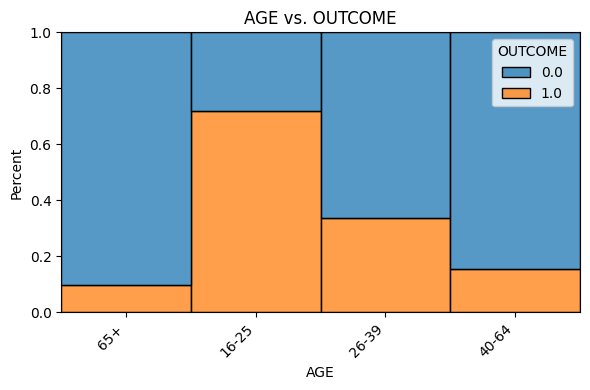

In [435]:
feature= 'AGE'
plot_categorical_vs_target(df, 'AGE', 'OUTCOME', target_type='class');

- Age group between 16 and 25 has the biggest number of insurance claim followed by age group 26 to 39

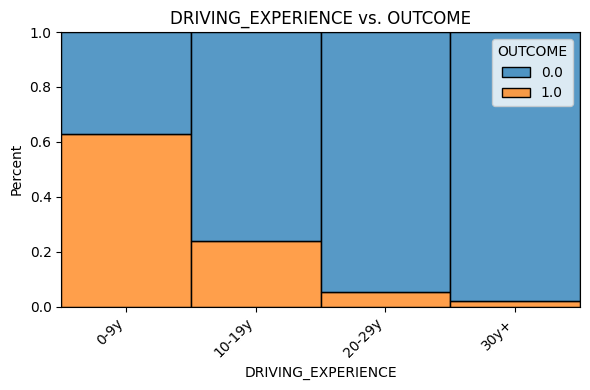

In [436]:
feature= 'DRIVING_EXPERIENCE'
plot_categorical_vs_target(df, 'DRIVING_EXPERIENCE', 'OUTCOME', target_type='class');

- The lowest driving experiance between 0 and 9 has the highest insurance claims

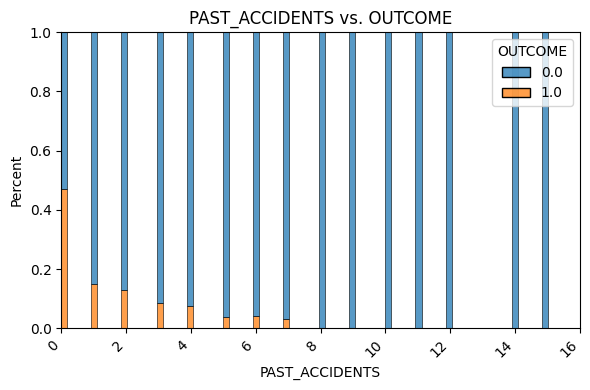

In [437]:
feature= 'PAST_ACCIDENTS'
plot_categorical_vs_target(df, 'PAST_ACCIDENTS', 'OUTCOME', target_type='class');

- People how had accidents in the past have zero claims (the more accidents the cleint had in the past the less chance he/she will make an accident again)

### Data preprossing

#### Defining X and y

In [438]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

y= df['OUTCOME']
X = df.loc[ :, "AGE":"PAST_ACCIDENTS"]
###runing the X_train, X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Display X_train, Y_train
display(X_train.head(3), y_train.head(3))
display(y_train.value_counts())

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,40-64,male,majority,0-9y,high school,upper class,1.0,before 2015,1.0,1.0,NaN,sedan,0,0,0
4375,16-25,female,majority,0-9y,none,poverty,1.0,before 2015,0.0,0.0,12000.0,sedan,0,0,0
6698,40-64,male,majority,10-19y,university,upper class,1.0,before 2015,1.0,1.0,NaN,sedan,0,0,3


,OUTCOME
4901,1.0
4375,0.0
6698,0.0


,count
OUTCOME,
0.0,5144
1.0,2356


In [439]:
# Getting the shape of X
X_train.shape, X_test.shape

((7500, 15), (2500, 15))

In [440]:
# Checking the class balance
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

OUTCOME
0.0    5144
1.0    2356
Name: count, dtype: int64
OUTCOME
0.0    0.685867
1.0    0.314133
Name: proportion, dtype: float64


- Our class isnt banlanced we will balance the data using somte

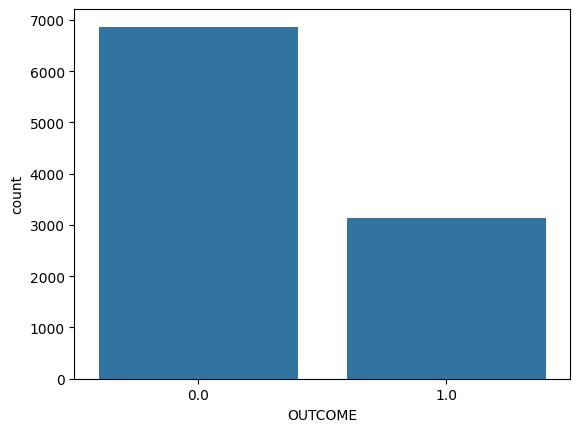

In [441]:
###Visualizing the balance between of OUTCOME
sns.countplot(data=df, x='OUTCOME');

- The class isn't perfectly balanced we have about 68% of class 0 (no claims) and about 32% of class 1 (yes claims)

#### Making a pipeline and column transfer

A) Ordinal features

In [442]:
### Checking which columns are ordinal
### creating a fillter for categorical columns
cat_cols_train= df.dtypes[df.dtypes == 'object'].index
### Checking which columns are ordinal
for col in cat_cols_train:
  print(col)
  print(df[col].value_counts(dropna=False))
  print('\n')

AGE
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64


GENDER
GENDER
female    5010
male      4990
Name: count, dtype: int64


RACE
RACE
majority    9012
minority     988
Name: count, dtype: int64


DRIVING_EXPERIENCE
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64


EDUCATION
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64


INCOME
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64


VEHICLE_OWNERSHIP
VEHICLE_OWNERSHIP
1.0    6970
0.0    3030
Name: count, dtype: int64


VEHICLE_YEAR
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64


MARRIED
MARRIED
0.0    5018
1.0    4982
Name: count, dtype: int64


CHILDREN
CHILDREN
1.0    6888
0.0    3112
Name: count, dtype: int64


VEHICLE_TYPE
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dty

- Categorical features  that can be orderd are AGE, Driving experiance, Education and Income

In [443]:
### define a list of columns to encode as ordinal
ord_cols = ['AGE', 'DRIVING_EXPERIENCE','EDUCATION', 'INCOME' ]
### Making the OrdinalEncoder
###Specifying order of categories for our WeightGroup and AgeGroup Columms
AGE = ['16-25', '26-39', '40-64','65+']
DRIVING_EXPERIENCE = ['0-9y', '10-19y', '20-29y', '30y+']
EDUCATION = ['none', 'high school', 'university']
INCOME = ['poverty', 'working class','middle class', 'upper class']
### Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [AGE, DRIVING_EXPERIENCE, EDUCATION, INCOME]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
### Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
###Making an ord_pipe
ord_pipe = make_pipeline(ord_encoder, scaler_ord)
### Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'],
                                             ['0-9y', '10-19y', '20-29y',
                                              '30y+'],
                                             ['none', 'high school',
                                              'university'],
                                             ['poverty', 'working class',
                                              'middle class', 'upper class']])),
                 ('standardscaler', StandardScaler())]),
 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME'])

b) For nominal features OHE


- I will choose drope = if binary to minimize the effect of multicolnerity in the model.

In [444]:
###Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
ohe_encoder = OneHotEncoder(sparse_output=False, drop= 'if_binary')
### Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
### Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoder Columns: Index(['GENDER', 'RACE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'VEHICLE_TYPE'],
      dtype='object')


('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(drop='if_binary', sparse_output=False))]),
 Index(['GENDER', 'RACE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
        'CHILDREN', 'VEHICLE_TYPE'],
       dtype='object'))

c) For numerical Features

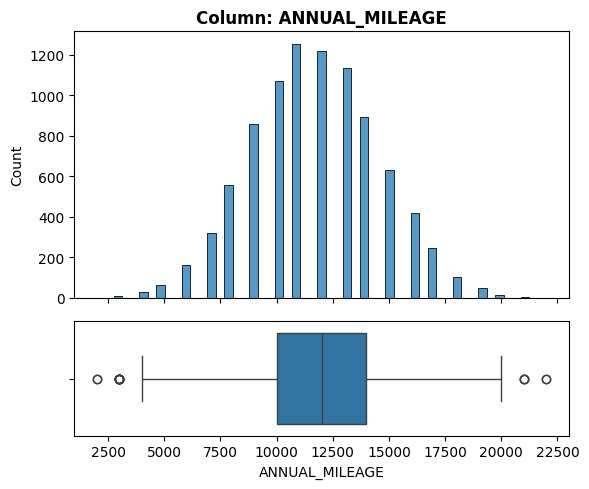

- NaN's Found: 957 (9.57%)
- Unique Values: 21
- Most common value: '11000.0' occurs 1253 times (12.53%)
- Not constant or quasi-constant.


In [445]:
### Visualizing annualmileage
feature= 'ANNUAL_MILEAGE'
explore_numeric(df,feature);

- Not many outliers
- We will impute the null values with the mean using simple imputer to prevent data leakage

In [446]:
### Save list of column names
num_cols_train = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols_train)
### instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
### Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe
### Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols_train)
num_tuple

Numeric Columns: Index(['ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'], dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'], dtype='object'))

d) Intiating column transfer

In [447]:
### Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],verbose_feature_names_out=False)
### Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
### Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['16-25',
                                                                              '26-39',
                                                                              '40-64',
                                                                              '65+'],
                                                                             ['0-9y',
                                                                              '10-19y',
                                                                              '20-29y',
                                                                              '...
                                                                              'upper '
                                                                              'class']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 Index(['GENDER', 'RACE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [448]:
### Transform the training data
X_train_tf = preprocessor.transform(X_train)
### Transform the testing data
X_test_tf = preprocessor.transform(X_test)
### View the processed training data
X_train_tf.head()

,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,GENDER_male,RACE_minority,VEHICLE_OWNERSHIP_1.0,VEHICLE_YEAR_before 2015,MARRIED_1.0,CHILDREN_1.0,VEHICLE_TYPE_sports car
4901,6.826978e-16,-0.659296,-0.432581,-0.643278,0.494466,-1.077028,-0.278819,0.956921,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4375,1.085747e-01,-0.659296,-0.432581,-0.643278,-1.451230,-1.077028,-1.631436,-1.661114,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6698,6.826978e-16,-0.659296,-0.432581,1.147363,0.494466,-0.072712,1.073798,0.956921,1.0,0.0,1.0,1.0,1.0,1.0,0.0
9805,3.111111e+00,0.229004,-0.432581,-0.643278,-0.478382,-0.072712,1.073798,-0.788436,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1101,-6.420595e-01,-0.659296,-0.432581,-0.643278,-1.451230,-1.077028,-1.631436,-1.661114,0.0,0.0,1.0,1.0,1.0,0.0,0.0


### Modeling

#### Default random forest calssifier

##### Definetion

In [449]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize, colorbar=colorbar, cmap=cmap_train, label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

##### Eavluating

In [450]:
###importing random forest calssifier
from sklearn.ensemble import RandomForestClassifier
###Instantiate default random forest model
rf = RandomForestClassifier(random_state = 42)
###Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)
###Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['16-25',
                                                                                               '26-39',
                                                                                               '40-6...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5144
         1.0       0.95      0.97      0.96      2356

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500



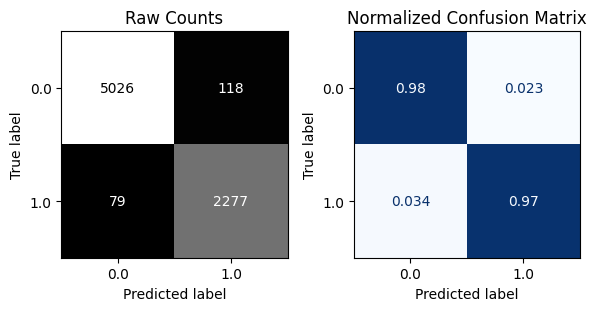


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1723
         1.0       0.74      0.64      0.69       777

    accuracy                           0.82      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.81      0.82      0.81      2500



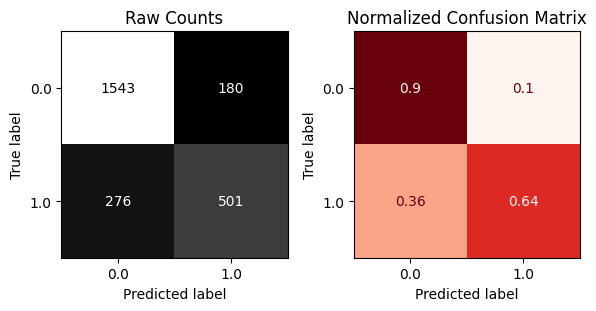

In [451]:
###Obtain complete evaluation for best performing model (k = 21)
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

- The model isn't perfectly balanced
- The model is over fitting the weighted avg in the training data is 97% and in the test data is 82%

### permutation importance

##### Definition

In [452]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n= 7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

##### Getting the per importances

In [453]:
from sklearn.inspection import permutation_importance
###Defining permutation
per = permutation_importance(rf, X_test_tf, y_test,n_repeats =5, random_state = 42)
per.keys()
per_importances = pd.Series(per['importances_mean'],index=X_train_tf.columns, name = 'permutation importance')
per_importances = per_importances.sort_values(ascending=False)
per_importances.head()

,permutation importance
VEHICLE_OWNERSHIP_1.0,0.04432
DRIVING_EXPERIENCE,0.04416
VEHICLE_YEAR_before 2015,0.04288
GENDER_male,0.00848
MARRIED_1.0,0.00672


##### Plotting the per importances

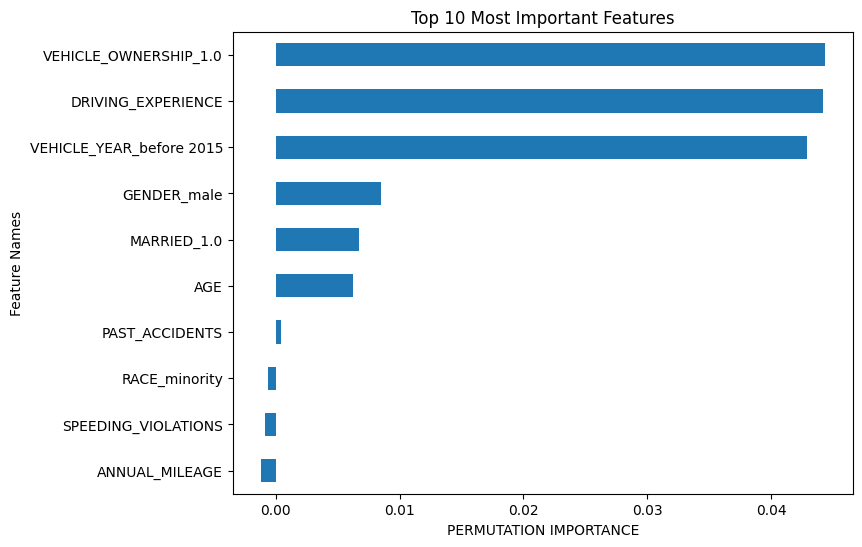

In [454]:
ax = plot_importance_color_ax(per_importances,color_dict=None,top_n=10);
ax.set_xlabel("PERMUTATION IMPORTANCE");

- The first top importance is driving experiance which makes totaly sence
- The second top is Vehicle owenership (owned or not yet)
- The third top importance is Vehicle year of registration before or after 2015

According to the business case whether these top 10 features have an effect on making a car inssurance claim, the answer is defenatly yes.

### Visualizing the top three importances Vs the target

In [461]:
# Create a copy of the cleaned data frame
df1= df1.copy()
# Impute 'ANNUAL_MILEAGE' with the mean
impute_mean = SimpleImputer(strategy='mean')
df1['ANNUAL_MILEAGE'] = impute_mean.fit_transform(df1[['ANNUAL_MILEAGE']])
print("\nCleaned dataframe info:")
display(df1.info())
print("\nCleaned dataframe head:")
display(df1.head())


Cleaned dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   VEHICLE_OWNERSHIP    10000 non-null  object 
 7   VEHICLE_YEAR         10000 non-null  object 
 8   MARRIED              10000 non-null  object 
 9   CHILDREN             10000 non-null  object 
 10  ANNUAL_MILEAGE       10000 non-null  float64
 11  VEHICLE_TYPE         10000 non-null  object 
 12  SPEEDING_VIOLATIONS  10000 non-null  int64  
 13  DUIS                 10000 non-null  int64  
 14  PAST_ACCIDENTS       10000 non-null  int64  
 15  OUTCOME     

None


Cleaned dataframe head:


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


1) Driving experience

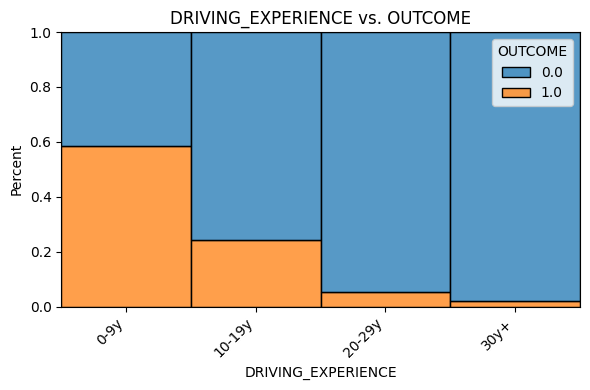

In [456]:
feature= 'DRIVING_EXPERIENCE'
plot_categorical_vs_target(df1, 'DRIVING_EXPERIENCE', 'OUTCOME', target_type='class');

- The less experiance the driver has the more posible claims they will make

2) VEHICLE_OWNERSHIP

/tmp/ipython-input-434-4131214251.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df[x] = temp_df[x].fillna(placeholder)


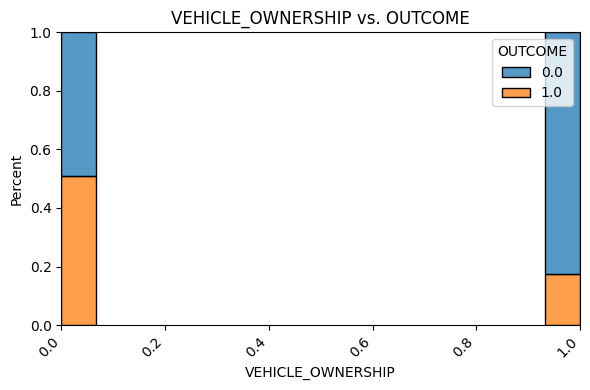

In [457]:
feature= 'VEHICLE_OWNERSHIP'
plot_categorical_vs_target(df1, 'VEHICLE_OWNERSHIP', 'OUTCOME', target_type='class');

- If the client ownes the vehichle less posible claims they will have.

3) VEHICLE_YEAR

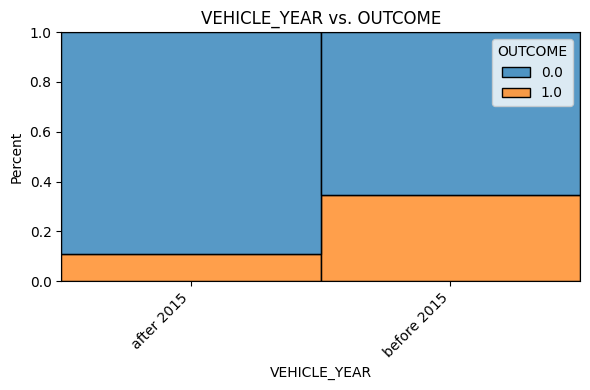

In [458]:
feature= 'VEHICLE_YEAR'
plot_categorical_vs_target(df1, 'VEHICLE_YEAR', 'OUTCOME', target_type='class');

- The older the vehicle registration is more claims will be.